<h1> Results Visualisation </h1>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from matplotlib import cm
from upsetplot import UpSet

<h3> Loading the results </h3>

In [2]:
htodemul_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results/Original parameters/resultHTO.csv")
multiseq_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results/Original parameters/resultMulti.csv")
hasheddrops_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results/Original parameters/resultHashed.csv")
demuxem_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results/Original parameters/output_demuxEM.csv")

<h3> HTODemul results </h3>
Data is transformed to dict to take part of a Dataframe later for plots

In [3]:
htodemul_results.columns = ["hashtag","classification"]
htodemul_results.reset_index(drop=True)
htodemul_results.head()

,hashtag,classification
0,AAACCCAAGGTGTGAC-1,Singlet
1,AAACCCAGTGAGAGGG-1,Negative
2,AAACGAAAGAATCTAG-1,Negative
3,AAACGAACACATATGC-1,Negative
4,AAACGAACACGACTAT-1,Singlet


In [4]:
htoDemul = htodemul_results['classification'].value_counts()
htoDemul_dict = htoDemul.to_dict()
htoDemul_dict['Algorithm'] = "HTODemul"

In [5]:
htoDemul_dict

{'Negative': 3205, 'Singlet': 1402, 'Doublet': 271, 'Algorithm': 'HTODemul'}

<h3> MULTI-seq results </h3>

In [6]:
multiseq_results.columns = ["hashtag","classification"]
multiseq_results.head()

,hashtag,classification
0,AAACCCAAGGTGTGAC-1,Hash454-TotalSeqA
1,AAACCCAGTGAGAGGG-1,Negative
2,AAACGAAAGAATCTAG-1,Hash455-TotalSeqA
3,AAACGAACACATATGC-1,Negative
4,AAACGAACACGACTAT-1,Hash452-TotalSeqA


In [7]:
multiseq = multiseq_results['classification'].value_counts()

In [8]:
multiseq_res_dict = multiseq.to_dict()
multiseq_res_dict

{'Negative': 2413,
 'Doublet': 902,
 'Hash454-TotalSeqA': 408,
 'Hash451-TotalSeqA': 246,
 'Hash452-TotalSeqA': 244,
 'Hash455-TotalSeqA': 241,
 'Hash456-TotalSeqA': 237,
 'Hash453-TotalSeqA': 187}

In [38]:
multiseq_copy = multiseq_results.copy()


In [40]:
multiseq_copy.loc[(multiseq_copy.classification == 'Hash454-TotalSeqA'),'classification']='Singlet'
multiseq_copy


,hashtag,classification
0,AAACCCAAGGTGTGAC-1,Singlet
1,AAACCCAGTGAGAGGG-1,Negative
2,AAACGAAAGAATCTAG-1,Hash455-TotalSeqA
3,AAACGAACACATATGC-1,Negative
4,AAACGAACACGACTAT-1,Hash452-TotalSeqA
...,...,...
4873,TTTGTTGAGTCCCAGC-1,Negative
4874,TTTGTTGCAGCGCGTT-1,Doublet
4875,TTTGTTGGTTATCTTC-1,Hash452-TotalSeqA
4876,TTTGTTGTCCAGTGTA-1,Singlet


In [46]:
multiseq_copy.loc[(multiseq_copy.classification == 'Hash453-TotalSeqA'),'classification']='Singlet'
multiseq_copy

,hashtag,classification
0,AAACCCAAGGTGTGAC-1,Singlet
1,AAACCCAGTGAGAGGG-1,Negative
2,AAACGAAAGAATCTAG-1,Singlet
3,AAACGAACACATATGC-1,Negative
4,AAACGAACACGACTAT-1,Singlet
...,...,...
4873,TTTGTTGAGTCCCAGC-1,Negative
4874,TTTGTTGCAGCGCGTT-1,Doublet
4875,TTTGTTGGTTATCTTC-1,Singlet
4876,TTTGTTGTCCAGTGTA-1,Singlet


In [9]:
multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet' or 'Negative')

/var/folders/10/sfmvfl9139b7z3wwbq1j88gr0000gn/T/ipykernel_20245/3548750218.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet' or 'Negative')


In [10]:
multiseq_dict = dict()
multiseq_dict['Singlet'] = multi_singlets

In [11]:
multiseq_dict['Doublet'] = multiseq_res_dict['Doublet']

In [12]:
multiseq_dict['Negative'] = 0

In [13]:
multiseq_dict['Algorithm'] = "MULTI-Seq"

In [14]:
multiseq_dict

{'Singlet': 4878, 'Doublet': 902, 'Negative': 0, 'Algorithm': 'MULTI-Seq'}

<h3> Hashed Drops Resuls </h3>

In [15]:
hasheddrops_results=hasheddrops_results.rename(columns = {'Confident':'Singlet','Unnamed: 0':'hashtag'})
hasheddrops_results.head()

,hashtag,Total,Best,Second,LogFC,LogFC2,Doublet,Singlet
0,AAACCCAAGGTGTGAC-1,702,3,4,0.012021,0.329709,False,False
1,AAACCCAGTGAGAGGG-1,624,3,5,1.452952,0.091920,False,False
2,AAACGAAAGAATCTAG-1,775,3,5,0.939847,0.095805,False,False
3,AAACGAACACATATGC-1,710,3,6,0.710428,0.027963,False,False
4,AAACGAACACGACTAT-1,869,2,3,0.117329,0.355157,False,False


In [16]:
drops_count_singlets = hasheddrops_results['Singlet'].value_counts()
drops_count_doublets = hasheddrops_results['Doublet'].value_counts()

In [17]:
drops_count_singlets

False    4828
True       50
Name: Singlet, dtype: int64

In [18]:
drops_count_doublets

False    4877
True        1
Name: Doublet, dtype: int64

In [19]:
drops_count_singlets.to_dict()
drops_count_doublets.to_dict()
b= drops_count_singlets[True] + drops_count_singlets[False]
a = drops_count_singlets[True]+drops_count_doublets[True]
c = b - a
c
#Necesito crear un dict que contenga los 3, neg doub, sing

4827

In [20]:
drop_dict = dict()
drop_dict['Singlet'] = drops_count_singlets[True]
drop_dict['Doublet'] = drops_count_doublets[True]
drop_dict['Negative'] = c
drop_dict['Algorithm'] = 'Hashed Drops'

In [50]:
drop_dict

{'Singlet': 50, 'Doublet': 1, 'Negative': 4827, 'Algorithm': 'Hashed Drops'}

In [51]:
hashed_drops = pd.DataFrame()
hashed_drops['hashtag'] = hasheddrops_results['hashtag']
hashed_drops['Singlet'] = hasheddrops_results['Singlet']
hashed_drops['Doublet'] = hasheddrops_results['Doublet']

In [52]:
hashed_drops

,hashtag,Singlet,Doublet
0,AAACCCAAGGTGTGAC-1,False,False
1,AAACCCAGTGAGAGGG-1,False,False
2,AAACGAAAGAATCTAG-1,False,False
3,AAACGAACACATATGC-1,False,False
4,AAACGAACACGACTAT-1,False,False
...,...,...,...
4873,TTTGTTGAGTCCCAGC-1,False,False
4874,TTTGTTGCAGCGCGTT-1,False,False
4875,TTTGTTGGTTATCTTC-1,False,False
4876,TTTGTTGTCCAGTGTA-1,False,False


In [53]:
hashed_drops['classification'] = np.where((hashed_drops['Singlet'] == hashed_drops['Doublet']),"Negative")

ValueError: either both or neither of x and y should be given

<h3> DemuxEM - results </h3>

In [21]:
demuxem_results.head()

,barcodekey,Channel,demux_type,assignment
0,AAACCCAAGGTGTGAC,NaN,doublet,"Hash451_TotalSeqA,Hash454_TotalSeqA"
1,AAACCCAGTGAGAGGG,NaN,singlet,Hash453_TotalSeqA
2,AAACGAAAGAATCTAG,NaN,unknown,NaN
3,AAACGAACACATATGC,NaN,unknown,NaN
4,AAACGAACACGACTAT,NaN,singlet,Hash452_TotalSeqA


In [22]:
demux = demuxem_results['demux_type'].value_counts()

In [23]:
demux_res_dict = demux.to_dict()
demux_res_dict

{'unknown': 2446, 'singlet': 1929, 'doublet': 514}

In [24]:
demux_res_dict["Negative"] = demux_res_dict.pop("unknown")
demux_res_dict["Singlet"] = demux_res_dict.pop("singlet")
demux_res_dict["Doublet"] = demux_res_dict.pop("doublet")

In [25]:
demux_res_dict['Algorithm'] = "DemuxEM"

In [26]:
demux_res_dict

{'Negative': 2446, 'Singlet': 1929, 'Doublet': 514, 'Algorithm': 'DemuxEM'}

In [59]:
demux_em = pd.DataFrame()
demux_em['hashtag'] = demuxem_results['barcodekey']
demux_em['classification'] = demuxem_results['demux_type']
demux_em

,hashtag,classification
0,AAACCCAAGGTGTGAC,doublet
1,AAACCCAGTGAGAGGG,singlet
2,AAACGAAAGAATCTAG,unknown
3,AAACGAACACATATGC,unknown
4,AAACGAACACGACTAT,singlet
...,...,...
4884,TTTGTTGAGTCCCAGC,unknown
4885,TTTGTTGCAGCGCGTT,singlet
4886,TTTGTTGGTTATCTTC,unknown
4887,TTTGTTGTCCAGTGTA,singlet


In [62]:
demux_em.loc[(demux_em.classification == 'unknown'),'classification']='Negative'
demux_em

,hashtag,classification
0,AAACCCAAGGTGTGAC,Doublet
1,AAACCCAGTGAGAGGG,Singlet
2,AAACGAAAGAATCTAG,Negative
3,AAACGAACACATATGC,Negative
4,AAACGAACACGACTAT,Singlet
...,...,...
4884,TTTGTTGAGTCCCAGC,Negative
4885,TTTGTTGCAGCGCGTT,Singlet
4886,TTTGTTGGTTATCTTC,Negative
4887,TTTGTTGTCCAGTGTA,Singlet


<h3> General results </h3>

In [27]:
dd = defaultdict(list)
for d in (htoDemul_dict,drop_dict,multiseq_dict,demux_res_dict): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dd)

defaultdict(<class 'list'>, {'Negative': [3205, 4827, 0, 2446], 'Singlet': [1402, 50, 4878, 1929], 'Doublet': [271, 1, 902, 514], 'Algorithm': ['HTODemul', 'Hashed Drops', 'MULTI-Seq', 'DemuxEM']})


In [28]:
results = pd.DataFrame(dict(dd))

In [29]:
results

,Negative,Singlet,Doublet,Algorithm
0,3205,1402,271,HTODemul
1,4827,50,1,Hashed Drops
2,0,4878,902,MULTI-Seq
3,2446,1929,514,DemuxEM


<AxesSubplot:title={'center':'Hashing Demultiplexing per algorithm'}, xlabel='Algorithm'>

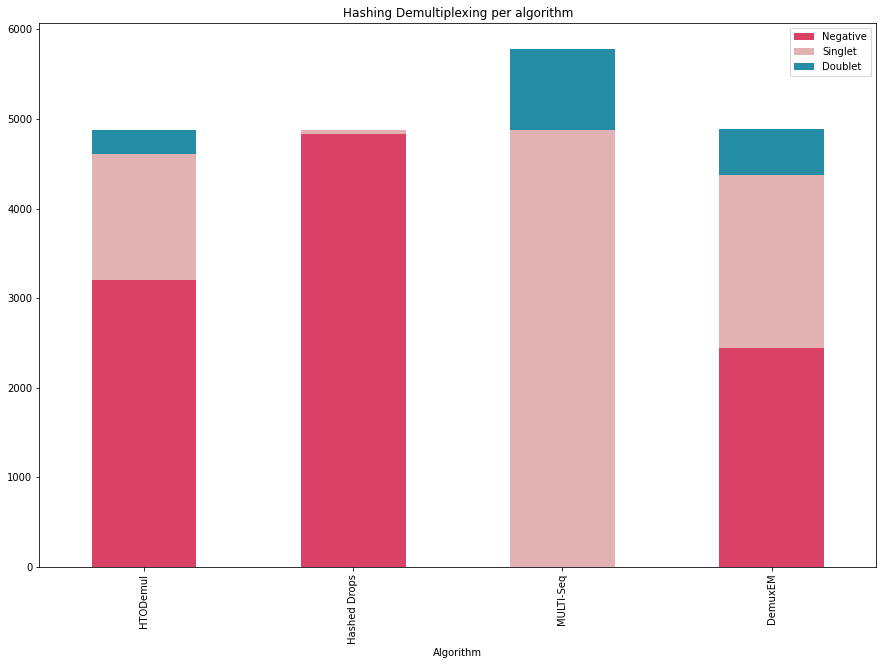

In [30]:
results.plot.bar(x='Algorithm', stacked=True,color=["#DA4167","#E2B1B1","#258EA6"], title='Hashing Demultiplexing per algorithm',figsize=(15, 10))

<h3> Dataframe for all results </h3>

In [56]:
results_classification = htodemul_results.copy()
results_classification.columns = ["hashtag","HTODemul"]
results_classification["Multi-seq"] = multiseq_copy["classification"]

In [63]:
results_classification["Demux_EM"] = demux_em['classification']

In [64]:
results_classification

,hashtag,HTODemul,Multi-seq,Demux_EM
0,AAACCCAAGGTGTGAC-1,Singlet,Singlet,Doublet
1,AAACCCAGTGAGAGGG-1,Negative,Negative,Singlet
2,AAACGAAAGAATCTAG-1,Negative,Singlet,Negative
3,AAACGAACACATATGC-1,Negative,Negative,Negative
4,AAACGAACACGACTAT-1,Singlet,Singlet,Singlet
...,...,...,...,...
4873,TTTGTTGAGTCCCAGC-1,Negative,Negative,Singlet
4874,TTTGTTGCAGCGCGTT-1,Doublet,Doublet,Negative
4875,TTTGTTGGTTATCTTC-1,Negative,Singlet,Negative
4876,TTTGTTGTCCAGTGTA-1,Singlet,Singlet,Singlet


<h3> Upset Plot </h3>

In [ ]:
upset = UpSet(results_classification)  # disable the default bar chart
upset.add_stacked_bars(by="", colors=cm.Pastel1,
                       title="Hashing demultiplexing", elements=10)
upset.plot()
plt.suptitle("Classification as Singlets, Doublets or Negatives per algorithm")
plt.show()

In [67]:
#from upsetplot import plot
#plot(results_classification)  